In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [18]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 780B-C8E3

 Directory of C:\Users\Admin\OneDrive\Documents\Code\Research

03/08/2018  04:54 PM    <DIR>          .
03/08/2018  04:54 PM    <DIR>          ..
02/22/2018  02:08 PM    <DIR>          .ipynb_checkpoints
02/22/2018  01:58 PM               299 3dplot.py
03/07/2018  10:29 AM         2,324,847 depolymerization_statistics.txt
03/08/2018  04:54 PM            64,963 diffusion_statistics.ipynb
03/07/2018  10:29 AM        11,736,754 diffusion_statistics.txt
03/07/2018  10:29 AM         2,324,814 fragmentation_statistics.txt
02/22/2018  02:08 PM           266,382 lines3d.ipynb
02/22/2018  02:07 PM           426,803 wire3d.ipynb
               7 File(s)     17,144,862 bytes
               3 Dir(s)  263,005,106,176 bytes free


<IPython.core.display.Javascript object>


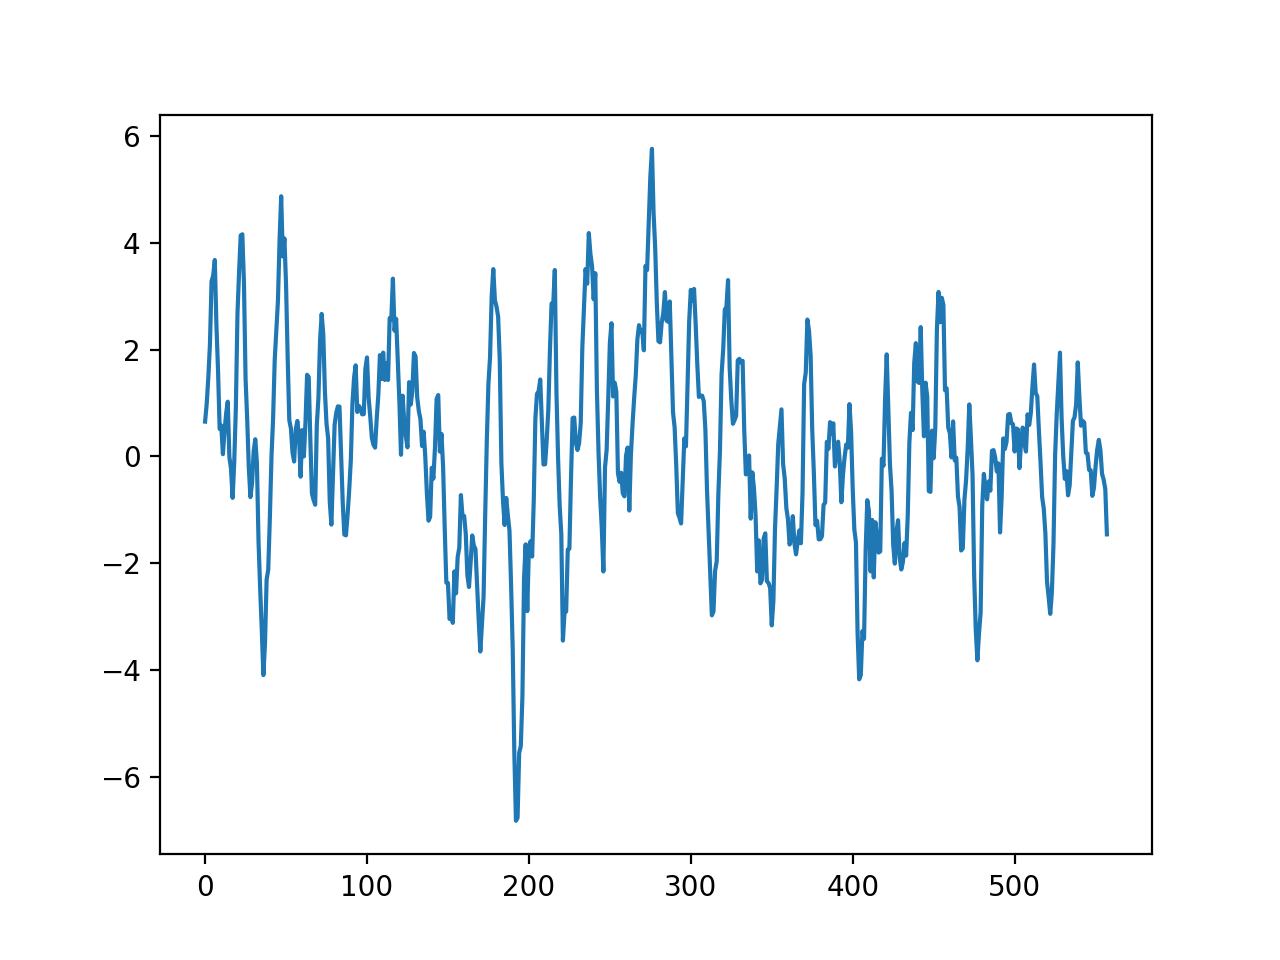

In [6]:
f=open('diffusion_statistics.txt','r')
f.readline()
up=[]
down=[]
count=0
length=5
for line in f.readlines():
    data=line.split()
    data=np.array(data,dtype=int)
    count+=1
    if count>300 and count<4000:
        temp_up=[]
        temp_down=[]
        for i in range(0,len(data)-4*length,4):
#             up.append(data[0::4])
#             down.append(data[1::4])
            temp_up.append(sum(data[i:i+4*length:4])/length)
            temp_down.append(sum(data[i+1:i+1+4*length:4])/length)
        up.append(temp_up)
        down.append(temp_down)
f.close()
averaged_up=np.mean(up,axis=0)
averaged_down=np.mean(down,axis=0)
plt.figure(1)
plt.plot(range(558),averaged_up-averaged_down)
plt.show()

<IPython.core.display.Javascript object>


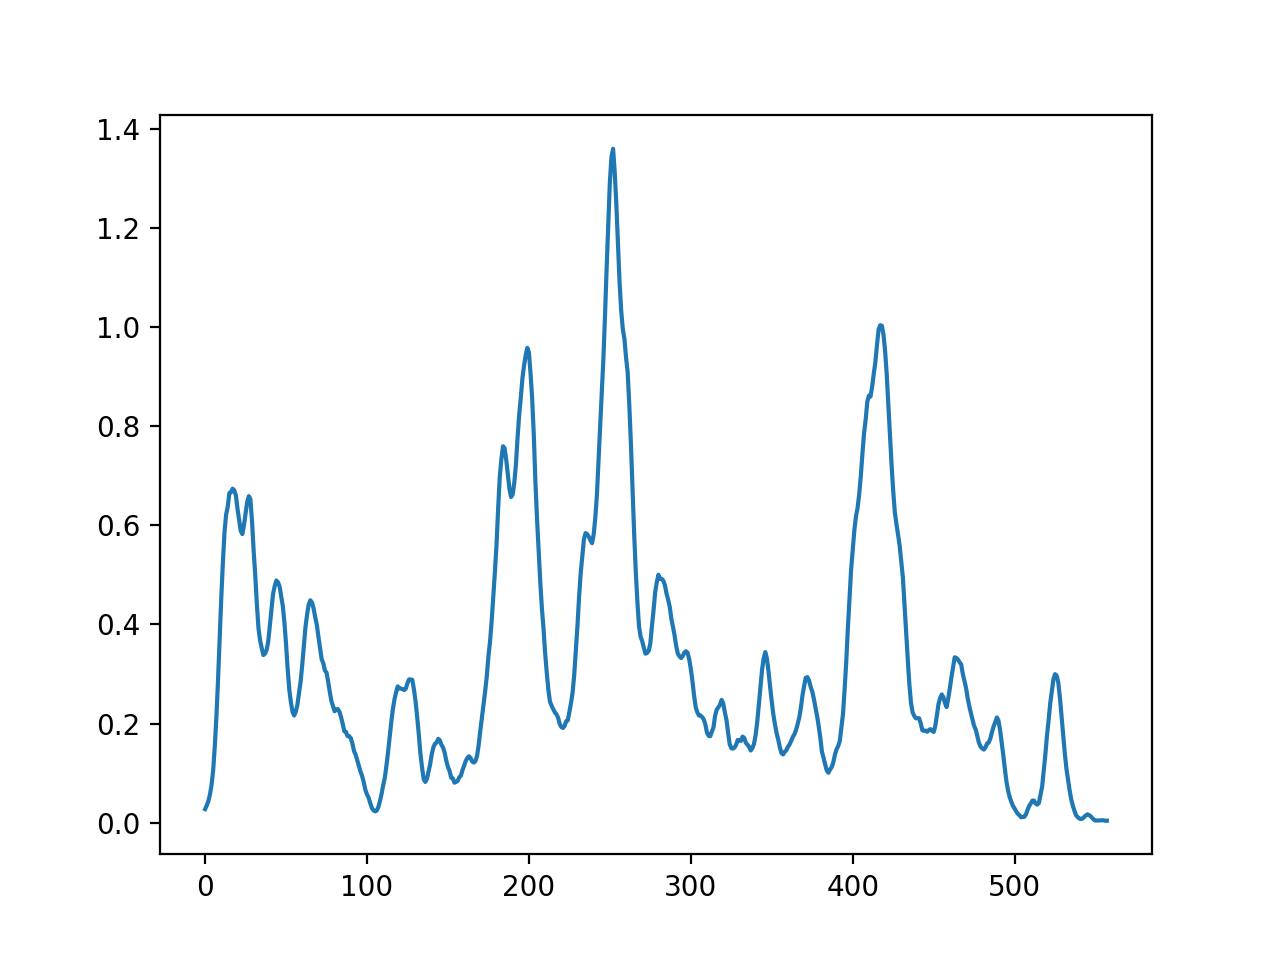

In [7]:
f=open('depolymerization_statistics.txt','r')
f.readline()
depoly=[]

count=0
length=5
for line in f.readlines():
    data=line.split()
    data=np.array(data,dtype=int)
    count+=1
    if count>300 and count<4000:
        temp_depoly=[]
        for i in range(0,len(data)-length,1):
#             up.append(data[0::4])
#             down.append(data[1::4])
            temp_depoly.append(sum(data[i:i+length:1])/length)
            
       
        depoly.append(temp_depoly)
f.close()
averaged_depoly=np.mean(depoly,axis=0)
plt.figure(2)
plt.plot(averaged_depoly)
plt.show()

<IPython.core.display.Javascript object>


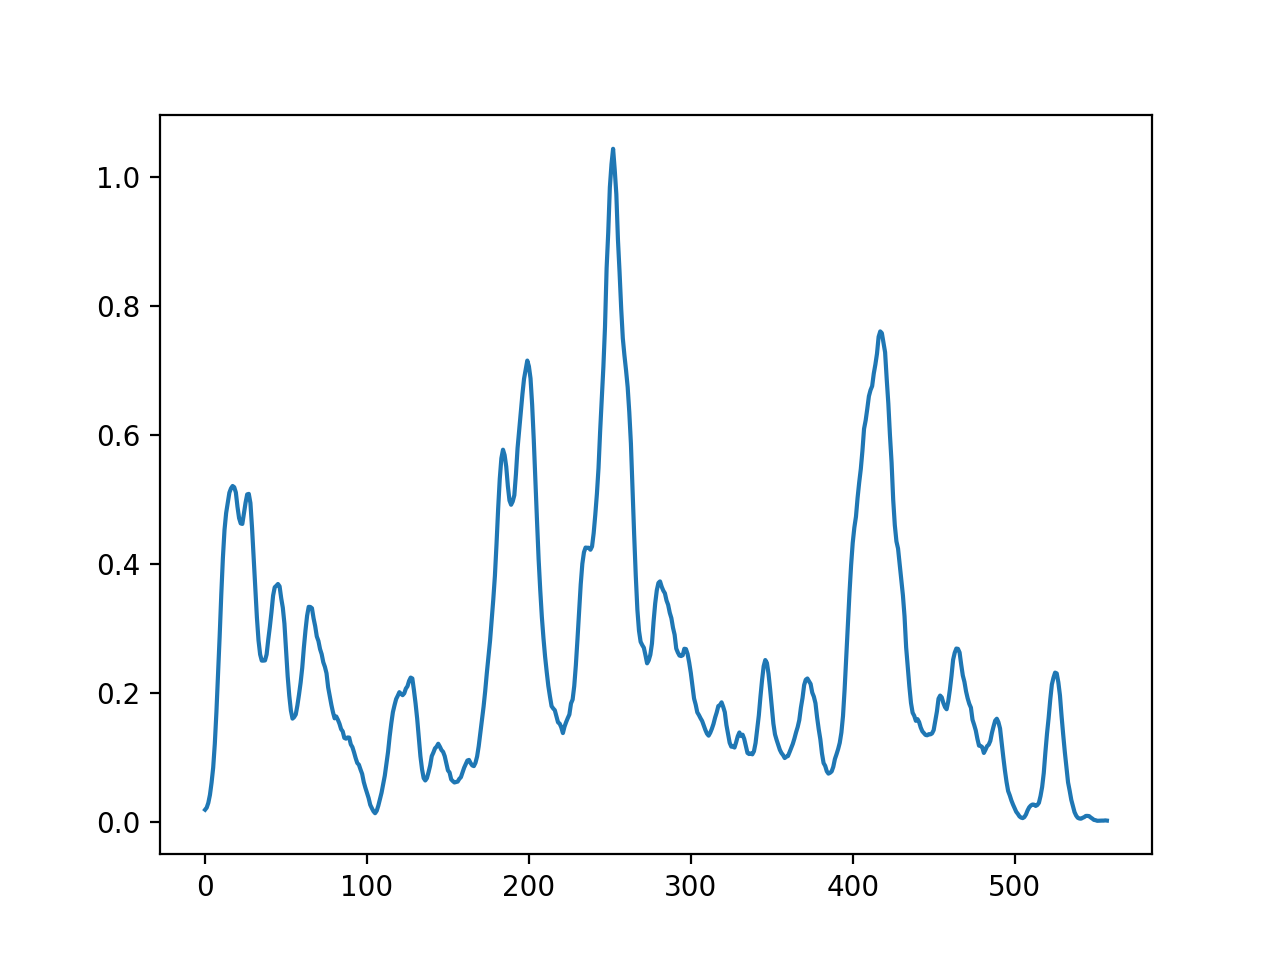

In [8]:
f=open('fragmentation_statistics.txt','r')
f.readline()
frag=[]

count=0
length=5
for line in f.readlines():
    data=line.split()
    data=np.array(data,dtype=int)
    count+=1
    if count>300 and count<4000:
        temp_frag=[]
        for i in range(0,len(data)-length,1):
#             up.append(data[0::4])
#             down.append(data[1::4])
            temp_frag.append(sum(data[i:i+length:1])/length)
            
       
        frag.append(temp_frag)
f.close()
averaged_frag=np.mean(frag,axis=0)
plt.figure(3)
plt.plot(averaged_frag)
plt.show()

In [22]:
plt.plot(averaged_depoly-averaged_frag)
plt.show()

In [23]:
plt.scatter(averaged_depoly,averaged_frag)
plt.show()

In [24]:
averaged_frag[:559].size

559

<IPython.core.display.Javascript object>


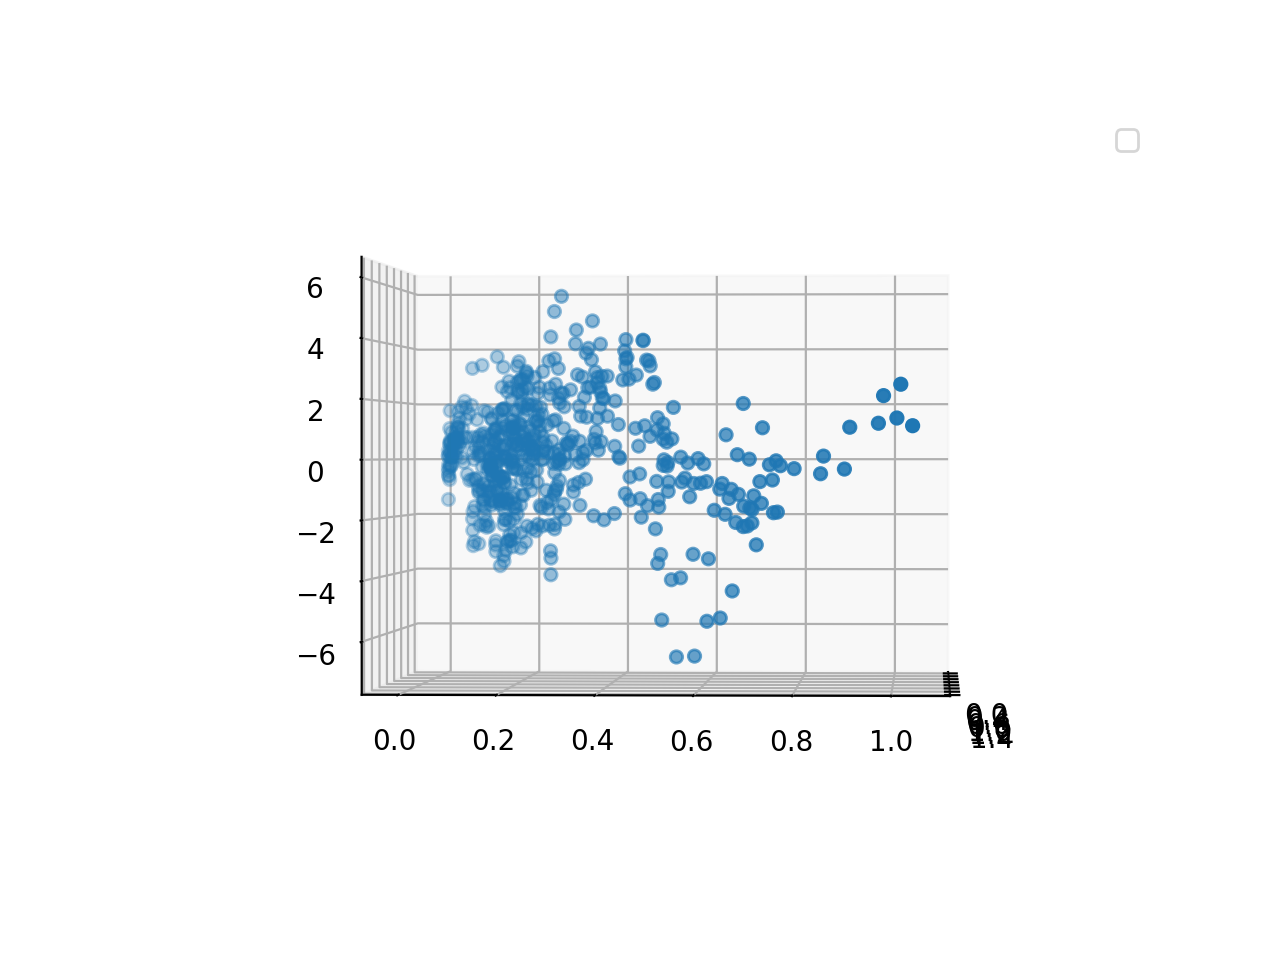

No handles with labels found to put in legend.


In [9]:
plt.figure(4)
fig=plt.figure(4,figsize=(20,20))
ax=fig.gca(projection='3d')
ax.scatter(averaged_depoly,averaged_frag,averaged_up-averaged_down)
ax.legend()

<IPython.core.display.Javascript object>


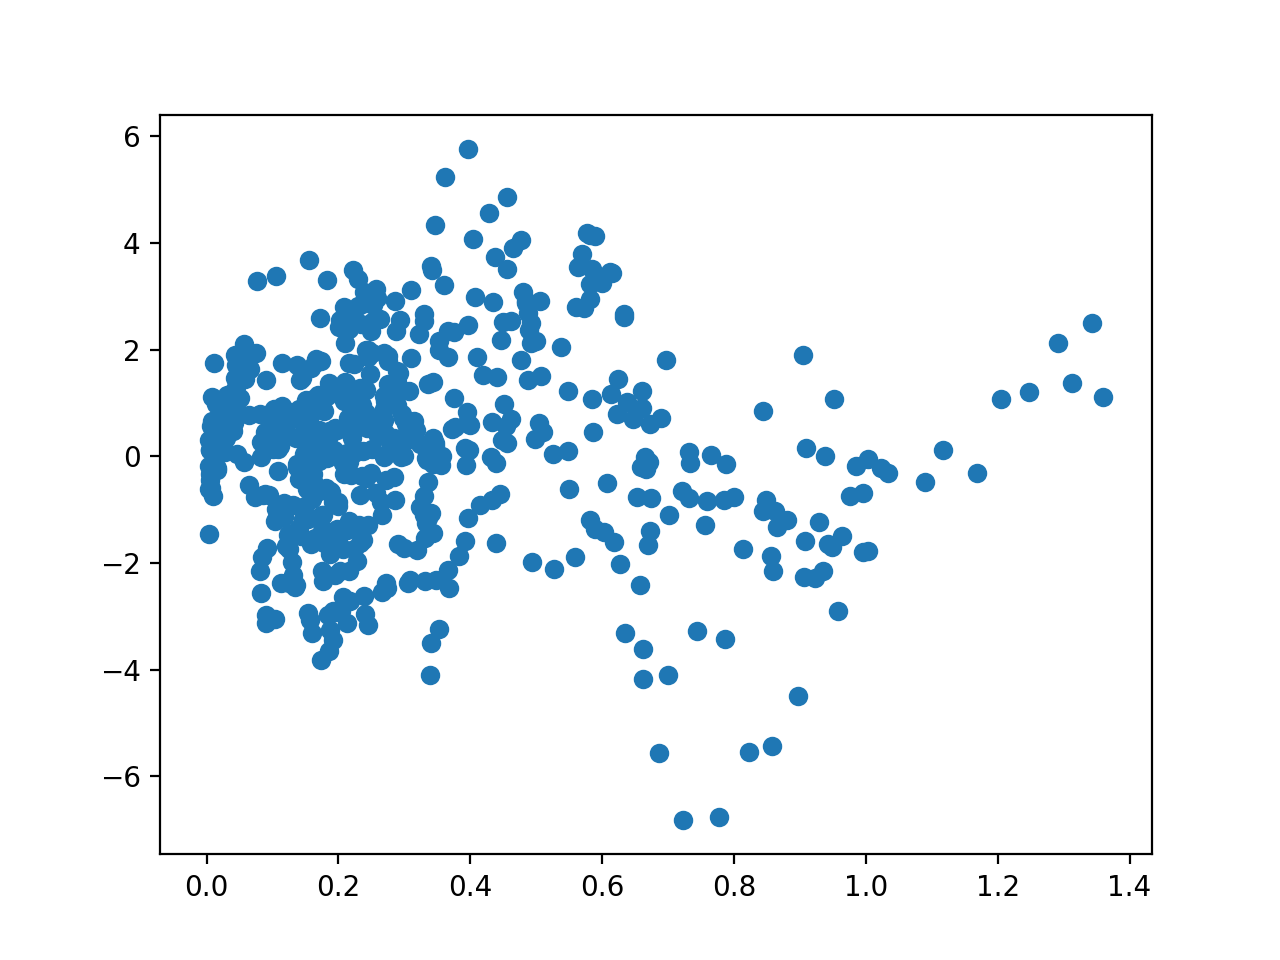

In [13]:
plt.figure(5)
fig=plt.figure(5,figsize=(20,20))
plt.scatter(averaged_depoly,averaged_up-averaged_down)

<IPython.core.display.Javascript object>


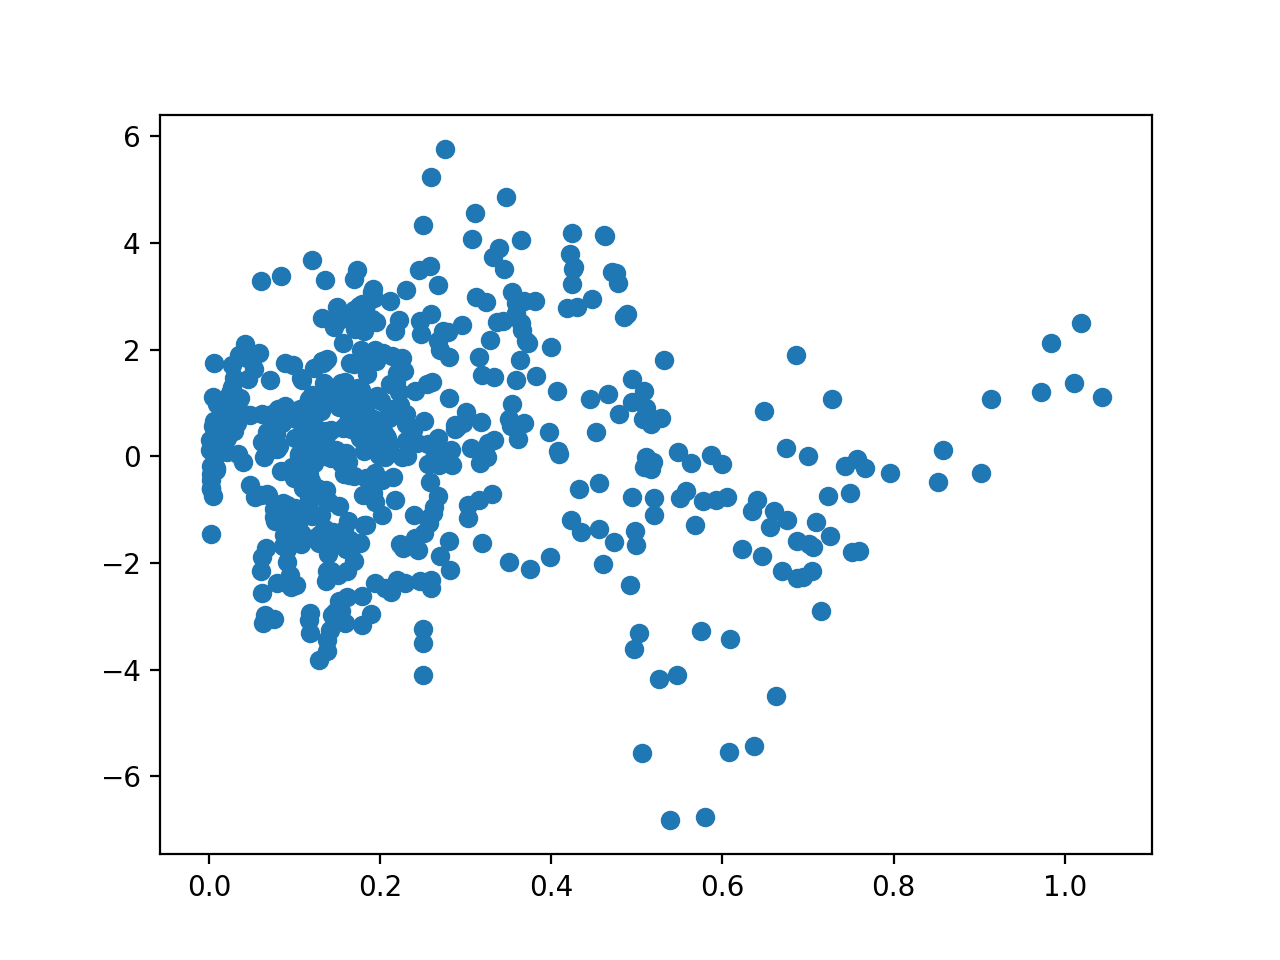

In [12]:
plt.figure(6)
fig=plt.figure(6,figsize=(20,20))
plt.scatter(averaged_frag,averaged_up-averaged_down)

In [58]:
left=260
right=300
(averaged_up-averaged_down)[left:right]

array([ 1.0722449 ,  0.90622449,  0.84612245,  1.19989796,  1.04346939,
        0.05510204, -0.33846939, -0.08642857, -0.19183673, -0.54642857,
       -0.13530612,  0.22132653,  0.23479592, -0.11540816,  0.22540816,
        0.27193878,  0.55183673,  0.72112245,  1.03122449,  1.35653061,
        1.82244898,  2.04795918,  2.3927551 ,  2.93132653,  2.73020408,
        2.35295918,  2.69091837,  2.71632653,  2.25887755,  2.36714286,
        2.10663265,  0.93867347,  0.1844898 ,  0.50244898,  0.58622449,
        0.64316327,  1.04071429,  0.75030612, -0.11234694, -0.47020408])

In [59]:
up=np.array(up,dtype=float)
down=np.array(down,dtype=float)

data_up=up[:,left:right]
#data_up=data_up[data_up>0]
data_down=down[:,left:right]

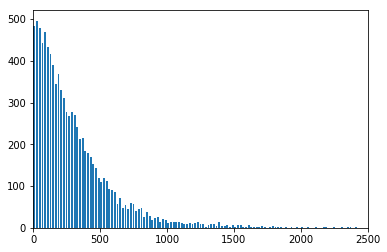

In [232]:

hist,bins=np.histogram(data_up[data_up>0],range=(0,10000),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width,label='up')
#plt.xscale('log')

plt.xlim([0,2500])
plt.show()

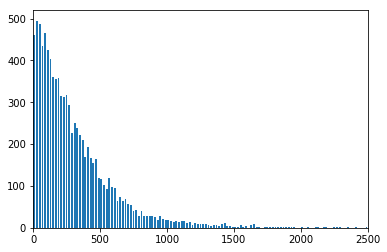

In [231]:
hist,bins=np.histogram(data_down[data_down>0],range=(0,10000),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width,label='down')
plt.xlim([0,2500])
plt.show()

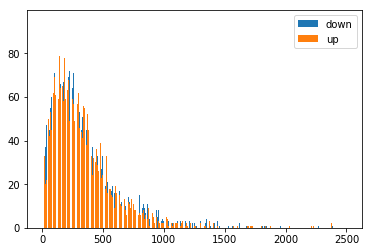

In [157]:
hist_down,bins=np.histogram(data_down[data_down>0],range=(0,2500),bins=2500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist_down,align='center',width=width,label='down')


hist_up,bins=np.histogram(data_up[data_up>0],range=(0,2500),bins=2500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist_up,align='center',width=width,label='up')
#plt.xscale('log')

plt.legend()
#plt.xlim([0,2500])
plt.show()

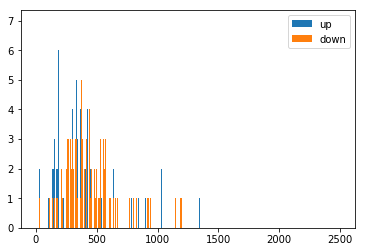

In [142]:
plt.bar(center,hist_up,align='center',width=width,label='up')
#plt.xscale('log')

plt.bar(center,hist_down,align='center',width=width,label='down')

plt.legend()
#plt.xlim([0,2500])
plt.show()

In [60]:
scipy.stats.wilcoxon(data_up.flatten(),data_down.flatten(),zero_method='wilcox')

WilcoxonResult(statistic=1390033791.5, pvalue=3.2068979807359081e-11)